### Protein analysis FL+FBM+CB 
### 26-04-21

In [1]:
#SETTING ENVIRONMENT 

import rpy2
#import tzlocal
#%load_ext rpy2.ipython

import numpy as np
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, dpi_save=1000)

/usr/local/lib/python3.7/dist-packages/numba/core/cpu.py:77: UserWarning: Numba extension module 'sparse._numba_extension' failed to load due to 'ModuleNotFoundError(No module named 'numba.targets')'.
  numba.core.entrypoints.init_all()


In [2]:
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 

# Read protein data 

Although these protein pools contain donors that are not of our interest, we will filter by 
already demultiplexed mRNA.There is no need to demultiplex here.

In [3]:
path_to ='/home/mq224/rds/rds-bg200-hphi-gottgens/users/mq224/HCA_project/Mapping_results/Results_citeseq'

#### Read Fetal bone marrow

In [4]:
#SIGAF3 counterpart - SIGAD12

adata1 = sc.read_mtx(path_to +'/SIGAD12/umi_count/matrix.mtx.gz')
adata1 = adata1.T
adata1_features = pd.read_csv(path_to + '/SIGAD12/umi_count/features.tsv.gz', sep ="-", header=None)
adata1_barcodes = pd.read_csv(path_to + '/SIGAD12/umi_count/barcodes.tsv.gz', header=None)

adata1.var_names = adata1_features[0]
adata1.obs_names = adata1_barcodes[0]
adata1.obs["Sample"] = "SIGAD12"


print("adata1 shape: "+str(adata1.shape))


#SIGAH3 counterpart - SIGAF12

adata2 = sc.read_mtx(path_to +'/SIGAF12/umi_count/matrix.mtx.gz')
adata2 = adata2.T
adata2_features = pd.read_csv(path_to + '/SIGAF12/umi_count/features.tsv.gz', sep ="-", header=None)
adata2_barcodes = pd.read_csv(path_to + '/SIGAF12/umi_count/barcodes.tsv.gz', header=None)

adata2.var_names = adata2_features[0]
adata2.obs_names = adata2_barcodes[0]
adata2.obs["Sample"] = "SIGAF12"



print("adata2 shape: "+str(adata2.shape))


#SIGAE5 counterpart - SIGAB11

adata3 = sc.read_mtx(path_to +'/SIGAB11/umi_count/matrix.mtx.gz')
adata3 = adata3.T
adata3_features = pd.read_csv(path_to + '/SIGAB11/umi_count/features.tsv.gz', sep ="-", header=None)
adata3_barcodes = pd.read_csv(path_to + '/SIGAB11/umi_count/barcodes.tsv.gz', header=None)

adata3.var_names = adata3_features[0]
adata3.obs_names = adata3_barcodes[0]
adata3.obs["Sample"] = "SIGAB11"


print("adata3 shape: "+str(adata3.shape))


adata1 shape: (25000, 199)
adata2 shape: (25000, 199)
adata3 shape: (13076, 199)


#### Read cord blood

In [5]:
#SIGAG7 CB (also called RPI2)

path_to_raw_CB ='/rds/project/bg200/rds-bg200-hphi-gottgens/users/mq224/project_citeseq/Mphil/CITE-seq/Batch2/CITE-seq-Count_output'

adata4 = sc.read_mtx(path_to_raw_CB +'/SIGAG7_5p_3mistmatches_CITEseqCount_Output/umi_count/matrix.mtx.gz')
adata4 = adata4.T
adata4_features = pd.read_csv(path_to_raw_CB + '/SIGAG7_5p_3mistmatches_CITEseqCount_Output/umi_count/features.tsv.gz', sep ="-", header=None)
adata4_barcodes = pd.read_csv(path_to_raw_CB + '/SIGAG7_5p_3mistmatches_CITEseqCount_Output/umi_count/barcodes.tsv.gz', header=None)

adata4.var_names = adata4_features[0]
adata4.obs_names = adata4_barcodes[0]

adata4.obs["Sample"] = "RPI2"
print("adata4 shape: "+str(adata4.shape))

adata4 shape: (10596, 199)


##### Fetal liver 

In [6]:
#SIGAA6 counterpart is SIGAA10
adata5 = sc.read_mtx(path_to +'/SIGAA10/umi_count/matrix.mtx.gz')
adata5 = adata5.T
adata5_features = pd.read_csv(path_to + '/SIGAA10/umi_count/features.tsv.gz', sep ="-", header=None)
adata5_barcodes = pd.read_csv(path_to + '/SIGAA10/umi_count/barcodes.tsv.gz', header=None)

adata5.var_names = adata5_features[0]
adata5.obs_names = adata5_barcodes[0]
adata5.obs["Sample"] = "SIGAA10"

print("adata5 shape: " + str(adata5.shape))


#SIGAA7 counterpart is SIGAH11
adata6 = sc.read_mtx(path_to +'/SIGAH11/umi_count/matrix.mtx.gz')
adata6 = adata6.T
adata6_features = pd.read_csv(path_to + '/SIGAH11/umi_count/features.tsv.gz', sep ="-", header=None)
adata6_barcodes = pd.read_csv(path_to + '/SIGAH11/umi_count/barcodes.tsv.gz', header=None)

adata6.var_names = adata6_features[0]
adata6.obs_names = adata6_barcodes[0]
adata6.obs["Sample"] = "SIGAH11"

print("adata6 shape: " + str(adata6.shape))


#SIGAC5 counterpart is SIGAH10
adata7 = sc.read_mtx("/home/mq224/rds/rds-bg200-hphi-gottgens/users/rlh60/Data/Lab_members/Niki/10X/SLX19554/Results/Repeats/Citeseq_repeat/SIGAH10/umi_count/matrix.mtx.gz")
adata7 = adata7.T
adata7_features = pd.read_csv("/home/mq224/rds/rds-bg200-hphi-gottgens/users/rlh60/Data/Lab_members/Niki/10X/SLX19554/Results/Repeats/Citeseq_repeat/SIGAH10/umi_count/features.tsv.gz", sep ="-", header=None)
adata7_barcodes = pd.read_csv("/home/mq224/rds/rds-bg200-hphi-gottgens/users/rlh60/Data/Lab_members/Niki/10X/SLX19554/Results/Repeats/Citeseq_repeat/SIGAH10/umi_count/barcodes.tsv.gz", header=None)

adata7.var_names = adata7_features[0]
adata7.obs_names = adata7_barcodes[0]
adata7.obs["Sample"] = "SIGAH10"


print("adata7 shape: "+str(adata7.shape))

adata5 shape: (23736, 199)
adata6 shape: (24999, 199)
adata7 shape: (25000, 199)


In [7]:
#Get rid of unmapped antibodies in each FL sample 

new_ab=[]
for ab in adata1.var_names:
    if ab !="unmapped":
        new_ab.append(ab)
        
adata1=adata1[:,pd.Index(new_ab)].copy()
print("adata1 shape: "+str(adata1.shape))
#the same in the other samples
adata2=adata2[:,pd.Index(new_ab)].copy()
print("adata2 shape: "+str(adata2.shape))
adata3=adata3[:,pd.Index(new_ab)].copy()
print("adata3 shape: "+str(adata3.shape))
adata4=adata4[:,pd.Index(new_ab)].copy()
print("adata4 shape: "+str(adata4.shape))
adata5=adata5[:,pd.Index(new_ab)].copy()
print("adata5 shape: "+str(adata5.shape))
adata6=adata6[:,pd.Index(new_ab)].copy()
print("adata6 shape: "+str(adata6.shape))
adata7=adata7[:,pd.Index(new_ab)].copy()
print("adata7 shape: "+str(adata7.shape))

adata1 shape: (25000, 198)
adata2 shape: (25000, 198)
adata3 shape: (13076, 198)
adata4 shape: (10596, 198)
adata5 shape: (23736, 198)
adata6 shape: (24999, 198)
adata7 shape: (25000, 198)


# Concatenate all the FL +FBM+CB in a single object

In [8]:
list_common_genes_raw = list(set(adata1.var_names) & set(adata2.var_names) & set(adata3.var_names) & set(adata4.var_names) & set(adata5.var_names) & set(adata6.var_names) & set(adata7.var_names))
print(len(list_common_genes_raw))

198


In [9]:
adata = adata1.concatenate(adata2,adata3, adata4, adata5, adata6, adata7)
print(adata)

AnnData object with n_obs × n_vars = 147407 × 198
    obs: 'Sample', 'batch'


In [10]:
#df=pd.DataFrame(adata.X.toarray(),columns=adata.var_names, index= adata.obs_names)
#df.to_csv("preQC_ADTraw_FL-FBM-CB.csv")

In [11]:
adata

AnnData object with n_obs × n_vars = 147407 × 198
    obs: 'Sample', 'batch'

In [12]:
adata_initial = adata.copy()

# Import mRNA to filter by its labels and incorporate its assignment and tissue metadata

In [13]:
pwd

'/rds/project/rds-SDzz0CATGms/users/mq224/project_citeseq/part2citeseq/PhD/Year_1/Collaborations/Haniffa_Lab/Comparison_HSPCs_CD34+_fromFBM_CB_and_FL/ADT'

In [14]:
#I SHOULD READ IT IN RAW

#Read mRNA that includes all mature populations 
mrna = sc.read("/home/mq224/rds/rds-bg200-hphi-gottgens-SDzz0CATGms/users/mq224/project_citeseq/part2citeseq/PhD/Year_1/Collaborations/Haniffa_Lab/Comparison_HSPCs_CD34+_fromFBM_CB_and_FL/mRNA/020221_FL_FBM_CB_FL/h5da_part3/20210426_mq224_mRNA_FL-FBM-CBgroups_mRNA_HSCMPP-I-IV_only_ccincluded_RAW.h5ad")

In [15]:
mrna_HSC = mrna.obs.groupby(['Cell.labels.P4.sorted']).apply(len)
mrna_HSC

Cell.labels.P4.sorted
HSC/MPP I      3438
HSC/MPP II     2762
HSC/MPP III     786
HSC/MPP IV     1596
dtype: int64

In [16]:
new=[]
for cell in mrna.obs_names:
    cell  = cell.replace('-1-',"-")
    new.append(cell)
mrna.obs_names = pd.Index(new)
common_cells = np.intersect1d(adata.obs_names,mrna.obs_names)
print(len(mrna.obs_names))
print(len(adata.obs_names))
print("Cells in common"+" "+str(len(common_cells)))

8582
147407
Cells in common 6427


In [17]:
adata.obs_names

Index(['GGGTGAATCACCGACG-0', 'AGGCCACTCCCAATAG-0', 'AGGTAGGGTGCATTTG-0',
       'TTAGTCTTCAATGTCG-0', 'TTGGGTATCGGCCAAC-0', 'AGAAGTAGTATTCCGA-0',
       'AGAAGCGGTTGTGTTG-0', 'TCAGCAACAAGTTCGT-0', 'CTTCGGTCAAGCAGGT-0',
       'CTGGTCTCACCCAATA-0',
       ...
       'TATTTCGTCGGAATTC-6', 'AAAGTGACACCGTCGA-6', 'CGAAGTTCATGTCTAG-6',
       'TGTTGGAAGTCAGAGC-6', 'AACCATGTCCTCAGGG-6', 'GGTAGAGGTTCACGAT-6',
       'TAGGAGGAGTCGGCCT-6', 'GGGTCACTCTTGGAAC-6', 'GCGGAAAGTACGGTTT-6',
       'ACTTCGCCAACTGAAA-6'],
      dtype='object', length=147407)

In [18]:
adata = adata[np.unique(common_cells),:].copy()
adata.obs["Tissue"] = mrna.obs["Tissue"]
adata.obs["assignment"] = mrna.obs["assignment"]

In [19]:
np.unique(adata.obs["assignment"])

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'],
      dtype=object)

In [20]:
np.unique(adata.obs["Tissue"])

array(['CB', 'FBM', 'FL'], dtype=object)

In [21]:
adata

AnnData object with n_obs × n_vars = 6427 × 198
    obs: 'Sample', 'batch', 'Tissue', 'assignment'

In [22]:
adata_tissue = adata.obs.groupby(["Tissue"]).apply(len)
adata_tissue

Tissue
CB     2554
FBM     589
FL     3284
dtype: int64

In [23]:
adata_donor = adata.obs.groupby(["assignment"]).apply(len)
adata_donor

assignment
A     287
B    1228
C     510
D    1259
E     451
F      73
G      65
H     958
I     651
J     300
K     645
dtype: int64

In [24]:
adata

AnnData object with n_obs × n_vars = 6427 × 198
    obs: 'Sample', 'batch', 'Tissue', 'assignment'

In [25]:
#adata_initial.write("./20210420_HSCMPPI-IV_DEP_R3/20210426_mq224_initial_HSCP-MPP-I-IV_FBMS2-3-H3-F3-E5_CB-G7_FL-A7-A6-C5.h5ad")

# QC protein data 

In [26]:
#PREPROCESSING 

normalizing counts per cell
    finished (0:00:00)


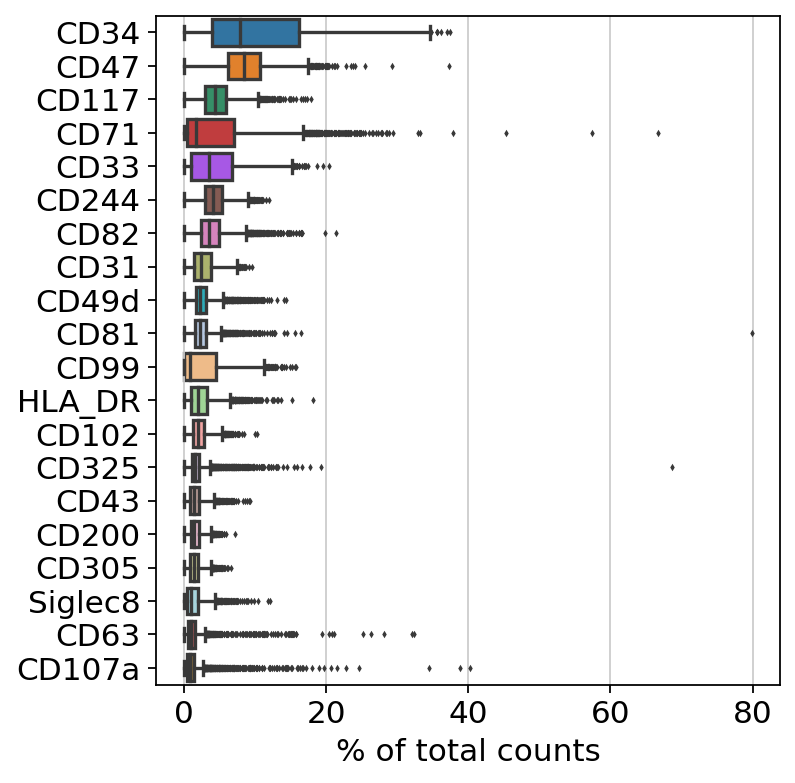

In [27]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [28]:
sc.pp.filter_cells(adata, min_genes=30) #they are not genes, but AB. The code is the same

... storing 'Sample' as categorical


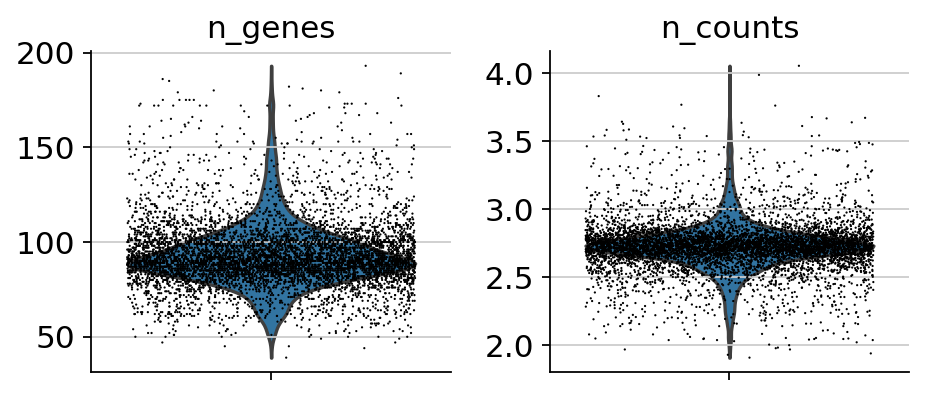

In [29]:
adata.obs['n_counts'] = np.log10(adata.X.sum(axis=1).A1) #they are not genes, but AB. The code is the same
sc.pl.violin(adata, ['n_genes', 'n_counts'],
             jitter=0.4, multi_panel=True)

In [30]:
adata.obs['n_counts'] = adata.X.sum(axis=1).A1

In [31]:
print(np.mean(adata.obs['n_counts']))
print(np.mean(adata.obs['n_genes']))

592.8783
93.23510191380115


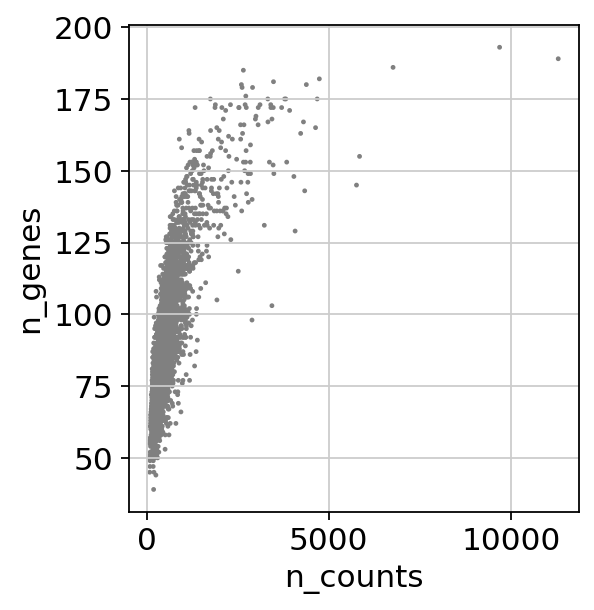

In [32]:
sc.pl.scatter(adata, x='n_counts', y='n_genes')

In [33]:
sc.pp.filter_genes(adata, min_cells=3)

In [34]:
adata = adata[adata.obs["n_counts"] < 5000, :]

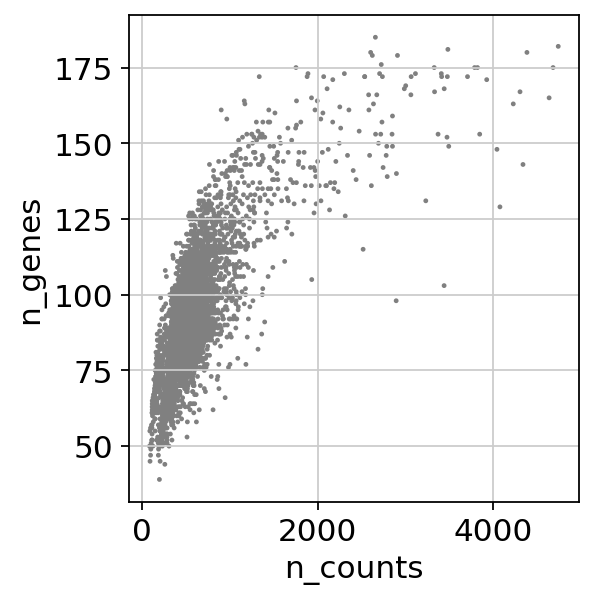

In [35]:
sc.pl.scatter(adata, x='n_counts', y='n_genes')

In [36]:
adata

View of AnnData object with n_obs × n_vars = 6422 × 198
    obs: 'Sample', 'batch', 'Tissue', 'assignment', 'n_genes', 'n_counts'
    var: 'n_cells'

In [37]:
print(mrna.obs['Cell.labels.HSC'])
mrna_celltype = mrna.obs.groupby(["Tissue"]).apply(len)
print(mrna)

AACGGGACACGACTAT-0    HSC/MPP
AAGAACATCGAAACAA-0    HSC/MPP
AAGACTCGTTCCTACC-0    HSC/MPP
AATTTCCGTCTGTTAG-0    HSC/MPP
ACATGCACATCTAACG-0    HSC/MPP
                       ...   
TTTCATGAGGCCTTGC-6    HSC/MPP
TTTCATGTCCGTGGCA-6    HSC/MPP
TTTCGATTCTTAGCCC-6    HSC/MPP
TTTGATCAGGTTCACT-6    HSC/MPP
TTTGGTTGTCCCGGTA-6    HSC/MPP
Name: Cell.labels.HSC, Length: 8582, dtype: category
Categories (1, object): [HSC/MPP]
AnnData object with n_obs × n_vars = 8582 × 24247
    obs: 'lanes', 'mad_prd', 'auto_prd', 'barcode', 'status', 'assignment', 'log_prob_singleton', 'log_prob_doublet', 'cluster0', 'cluster1', 'cluster2', 'Sample', 'Stage', 'Tissue', 'cluster3', 'batch', 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'leiden', 'Cell.labels.P4.sorted', 'Cell.labels.HSC'
    var: 'feature_types', 'gene_ids-0', 'gene_ids-1', 'gene_ids-2', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Samp

In [38]:
np.max(adata.X)

2847.0

In [39]:
adata_qc=adata.copy()

In [40]:
adata_qc.write("./20210420_HSCMPPI-IV_DEP_R3/20210426_mq224_postQC_FBMS2-3-H3-F3-E5_CB-G7_FL-A7-A6-C5.h5ad")

In [41]:
adata_qc

AnnData object with n_obs × n_vars = 6422 × 198
    obs: 'Sample', 'batch', 'Tissue', 'assignment', 'n_genes', 'n_counts'
    var: 'n_cells'

In [42]:
adata_qc_tissue = adata_qc.obs.groupby(["Tissue"]).apply(len)
adata_qc_tissue

Tissue
CB     2551
FBM     589
FL     3282
dtype: int64

In [43]:
adata_qc_donor = adata_qc.obs.groupby(["assignment"]).apply(len)
adata_qc_donor

assignment
A     287
B    1227
C     510
D    1258
E     451
F      73
G      65
H     958
I     651
J     299
K     643
dtype: int64

In [44]:
adata_qc_sample = adata_qc.obs.groupby(["Sample"]).apply(len)
adata_qc_sample

Sample
RPI2       2551
SIGAA10    1683
SIGAB11     451
SIGAD12      73
SIGAF12      65
SIGAH10     287
SIGAH11    1312
dtype: int64

In [45]:
import numpy as np
from sklearn.mixture import GaussianMixture
import anndata

cell_protein_matrix = adata_qc.copy()

In [46]:
print(adata_qc)
print(adata_initial)

AnnData object with n_obs × n_vars = 6422 × 198
    obs: 'Sample', 'batch', 'Tissue', 'assignment', 'n_genes', 'n_counts'
    var: 'n_cells'
AnnData object with n_obs × n_vars = 147407 × 198
    obs: 'Sample', 'batch'


### DSB METHOD - CLUSTERING AND VISUALIZATION

In [47]:
###########TEST: CAN WE GET RID OF THE BACKGROUND NOISE IN OUR PROTEIN DATA? DSB!

#SIGAD12_initial as the SUPER RAW

cell_protein_matrix = adata_initial[adata_qc.obs_names,:].copy()

#SIGAD12.shape
cell_protein_matrix.shape

(6422, 198)

In [48]:
# adata here must be the read in from raw umi matrix
#We need to define empty droplets. 
#You split out the data. You assign how many cells as empty droplets 
def getNegDroplets(adata, lamda=5): 
    #lamnda controls how many empty droplets you will have in the end.
    #Its very hard to tell which is the numner of empty droplets.
    umi = np.log1p(np.sum(adata.X.toarray(), axis=1)) #umis per cell
    mu_umi = np.mean(umi) #mean of umi counts
    sd_umi = np.std(umi) #SD of the umi counts 
    print(mu_umi)
    print(sd_umi)
    sub_threshold = mu_umi-(lamda*sd_umi) 
    print(sub_threshold)
    plt.hist(umi, bins = 100)
    plt.axvline(x=sub_threshold,color='red')
    #Simplified version. They used Seurat function,  but we dont want that.
    #anything less than that would be empty droplets.
    return adata[umi<sub_threshold,:].copy()
    #any cell that has umi counts < threshold. 

5.9104147
1.0262413
4.6789251327514645
(19574, 198)


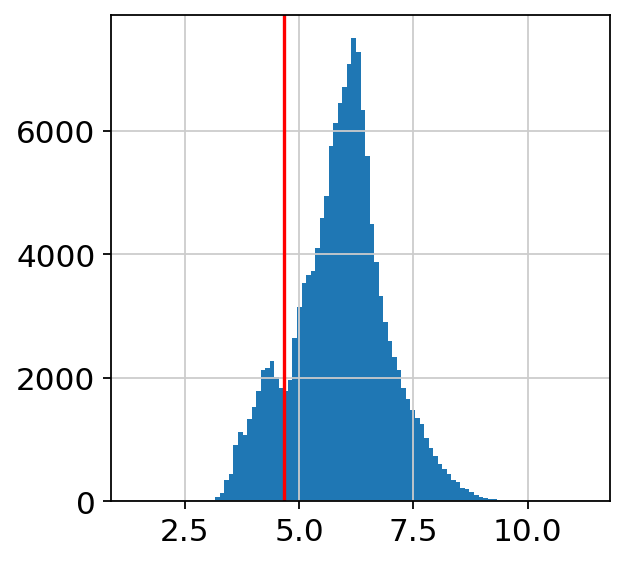

In [49]:
import matplotlib.pyplot as plt

empty_drop_matrix = getNegDroplets(adata_initial, lamda=1.2)
print(empty_drop_matrix.shape)

In [50]:
#renormalisation of the counts by empty droplets background.
#cell_protein_matrix and empty_drop_matrix are split from the same matrix,
#only difference is cells, but Ab is the same.
#cell_protein_matrix: adata object.
def DSB(cell_protein_matrix, empty_drop_matrix, pseudocount=10):
    adt = cell_protein_matrix.X.toarray() #meaningful cells xantibodies
    adtu = empty_drop_matrix.X.toarray() #the non meaninful - empty droplets 
    adt_log = np.log(adt+pseudocount) 
    adtu_log = np.log(adtu+pseudocount)
    mu_u = np.mean(adtu_log, axis=0) #for each protein in empty drop.
    sd_u = np.std(adtu_log, axis=0) #for each protein in empty drop.
    norm_adt = (adt_log-mu_u)/sd_u  #Y=log(Xi+P)-mu / sd
    adata_new = anndata.AnnData(X=norm_adt, obs=cell_protein_matrix.obs, var=cell_protein_matrix.var)
    #new normalised values
    print(adata_new.shape)
    cellwise_background_mean = np.array([]) #equation 2 from this line.
    for column in norm_adt.T:
        gmm = GaussianMixture(n_components=2) #for each protein
        gmm.fit(column.reshape(-1,1)) #you fit it
        cellwise_background_mean= np.append(cellwise_background_mean,gmm.means_[0])
        #you get the mean for the background
    print(len(cellwise_background_mean))
    adata_new.var['bg_mean'] = cellwise_background_mean #contains all the new normalised umi counts.
    #save it for the regression function, which we wont use!
    return adata_new

In [51]:
adata_new = DSB(cell_protein_matrix, empty_drop_matrix, pseudocount = 5)
cell_protein_matrix.shape

(6422, 198)
198


(6422, 198)

In [52]:
#empty_drop_matrix = getNegDroplets(adata)
#adata_new = DSB(cell_protein_matrix, empty_drop_matrix)
#sc.pp.regress_out(adata_new, keys=['bg_mean'])

adata_new.raw = adata_new

adata_new1=adata_new.copy().T

#for each protein you regress out the effect of the background noise.
####sc.pp.regress_out(adata_new1, keys=['bg_mean'])

adata_new2 = adata_new1.T

adata_new2.raw = adata_new

DSB_output0 = adata_new2.copy()

In [53]:
DSB_output0

AnnData object with n_obs × n_vars = 6422 × 198
    obs: 'Sample', 'batch'
    var: 'bg_mean'

In [54]:
DSB_output0.raw = DSB_output0

In [55]:
DSB_output0.write("./20210420_HSCMPPI-IV_DEP_R3/20210426_mq224_postQC_postDSB_FBMS2-3-H3-F3-E5_CB-G7_FL-A7-A6-C5.h5ad")

... storing 'Sample' as categorical


In [56]:
sc.tl.pca(DSB_output0, svd_solver='arpack')

computing PCA
    with n_comps=50
    finished (0:00:00)


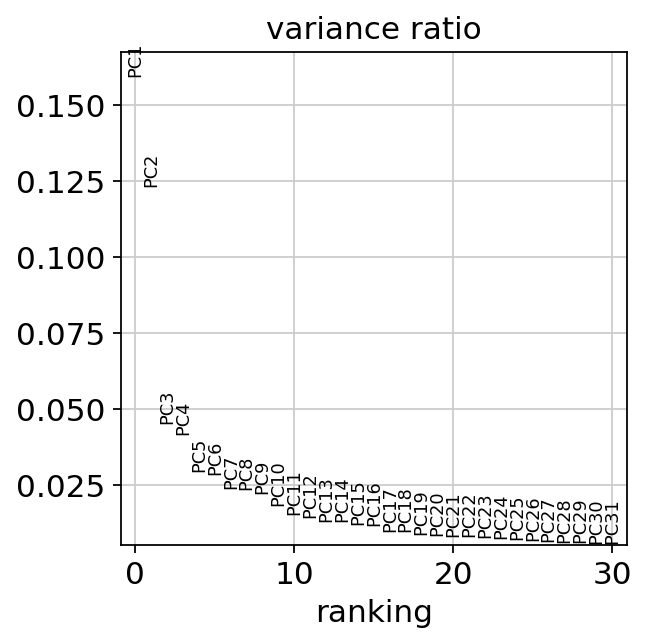

In [57]:
sc.pl.pca_variance_ratio(DSB_output0, log=False)

In [58]:
sc.pp.neighbors(DSB_output0, n_neighbors=10, n_pcs=30)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)


In [59]:
sc.tl.umap(DSB_output0)
sc.tl.draw_graph(DSB_output0)
sc.tl.leiden(DSB_output0, resolution=0.5)
sc.tl.louvain(DSB_output0, resolution=0.5)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:38)
running Leiden clustering
    finished: found 12 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 9 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


In [60]:
DSB_output0.write("./20210420_HSCMPPI-IV_DEP_R3/20210426_mq224_postQC_postDSB_postFDG_FBMS2-3-H3-F3-E5_CB-G7_FL-A7-A6-C5.h5ad")

In [61]:
DSB_output0 

AnnData object with n_obs × n_vars = 6422 × 198
    obs: 'Sample', 'batch', 'leiden', 'louvain'
    var: 'bg_mean'
    uns: 'pca', 'neighbors', 'umap', 'draw_graph', 'leiden', 'louvain'
    obsm: 'X_pca', 'X_umap', 'X_draw_graph_fa'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [62]:
markers = ['CD19', 'IgG_Fc', 'CD45RA', 'CD81', 'IgM', 'CD10', 'CD22',
       'integrin_b7', 'CD24', 'CD105', 'CD72', 'CD9']

In [63]:
DSB_output0.obs["assignment"]=adata.obs["assignment"]
DSB_output0.obs["Tissue"]=adata.obs["Tissue"]


In [64]:
DSB_output0.obs['Cell.labels.HSC']=mrna.obs['Cell.labels.HSC']
DSB_output0.obs['Cell.labels.P4.sorted']=mrna.obs['Cell.labels.P4.sorted']

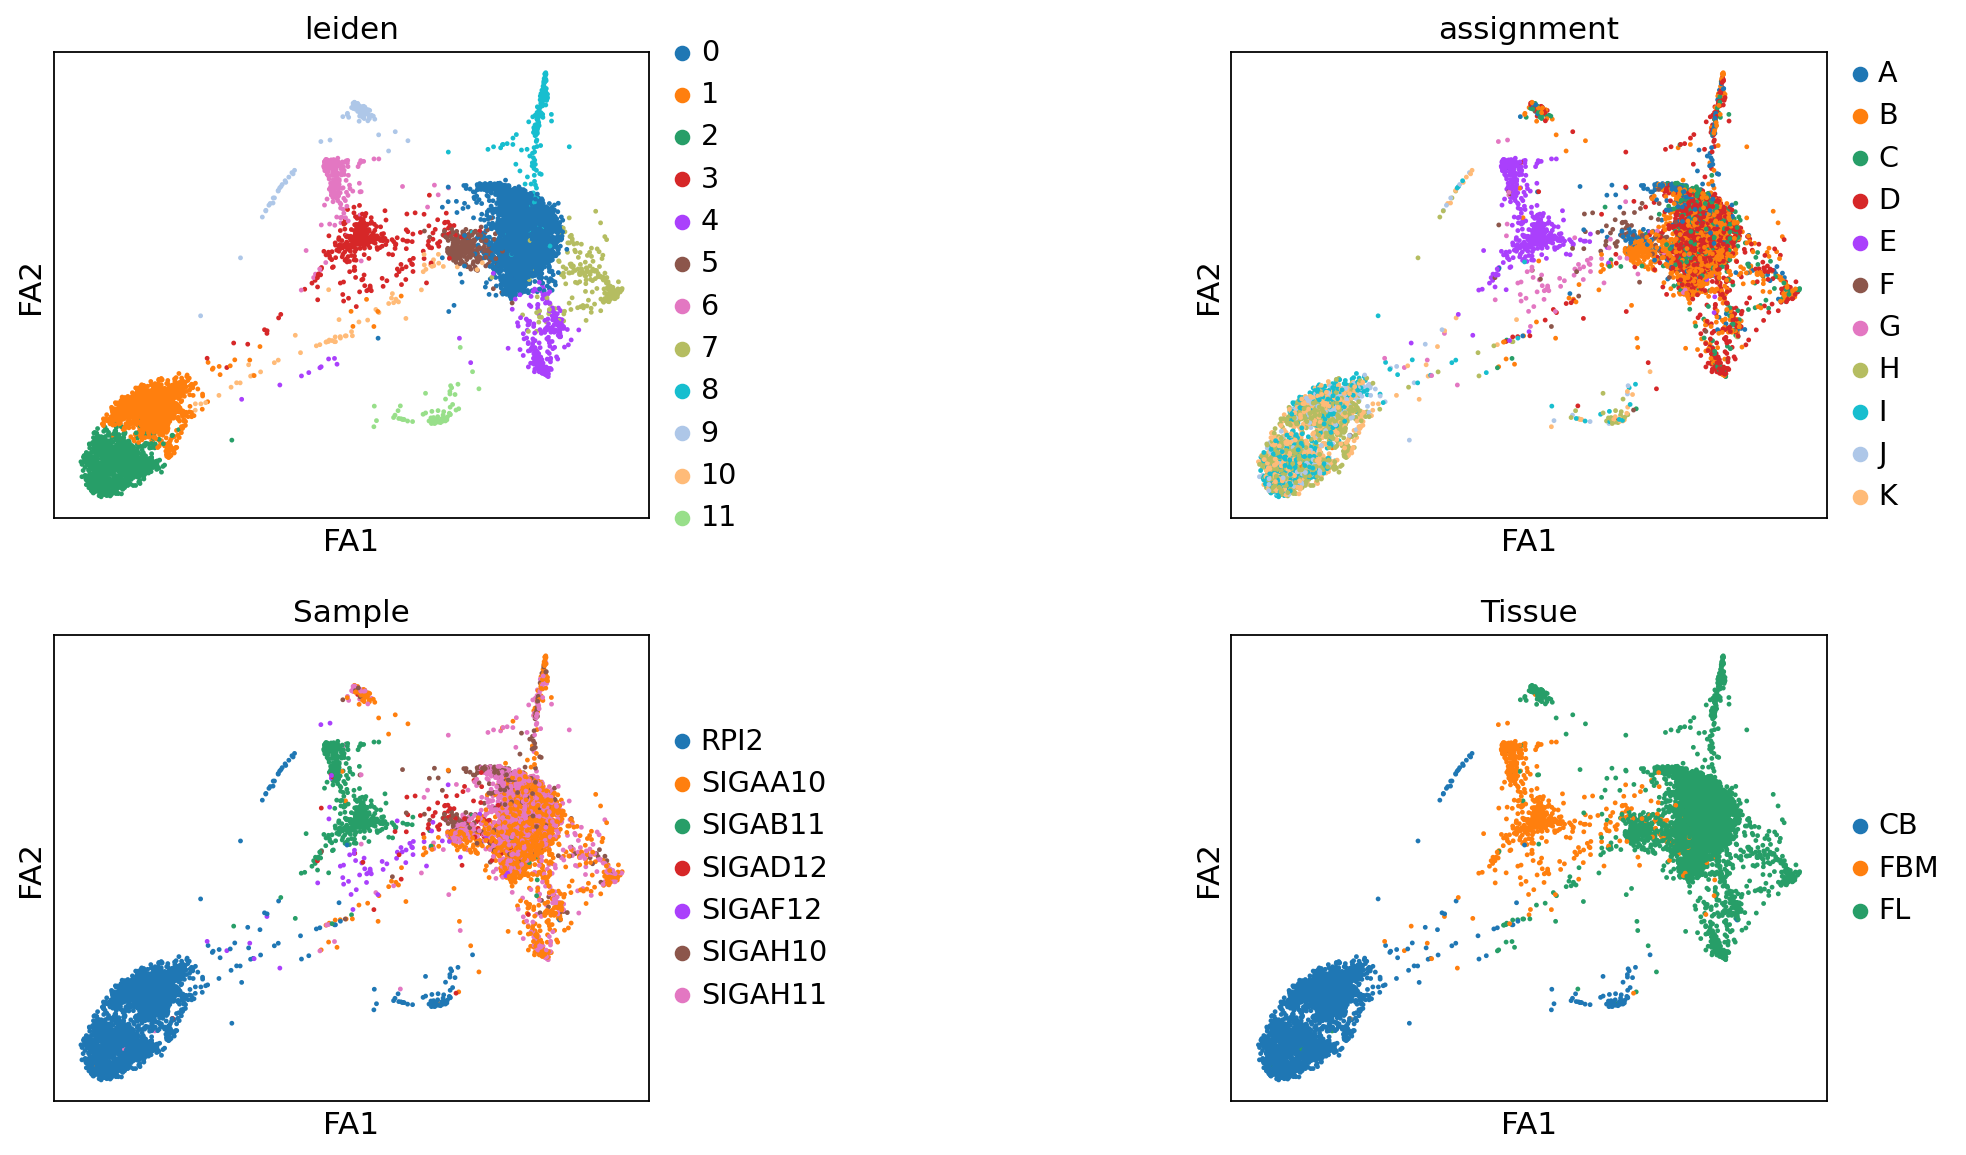

In [65]:
sc.pl.draw_graph(DSB_output0, color=['leiden','assignment','Sample','Tissue'], ncols=2, wspace = 0.8, cmap=cmap)

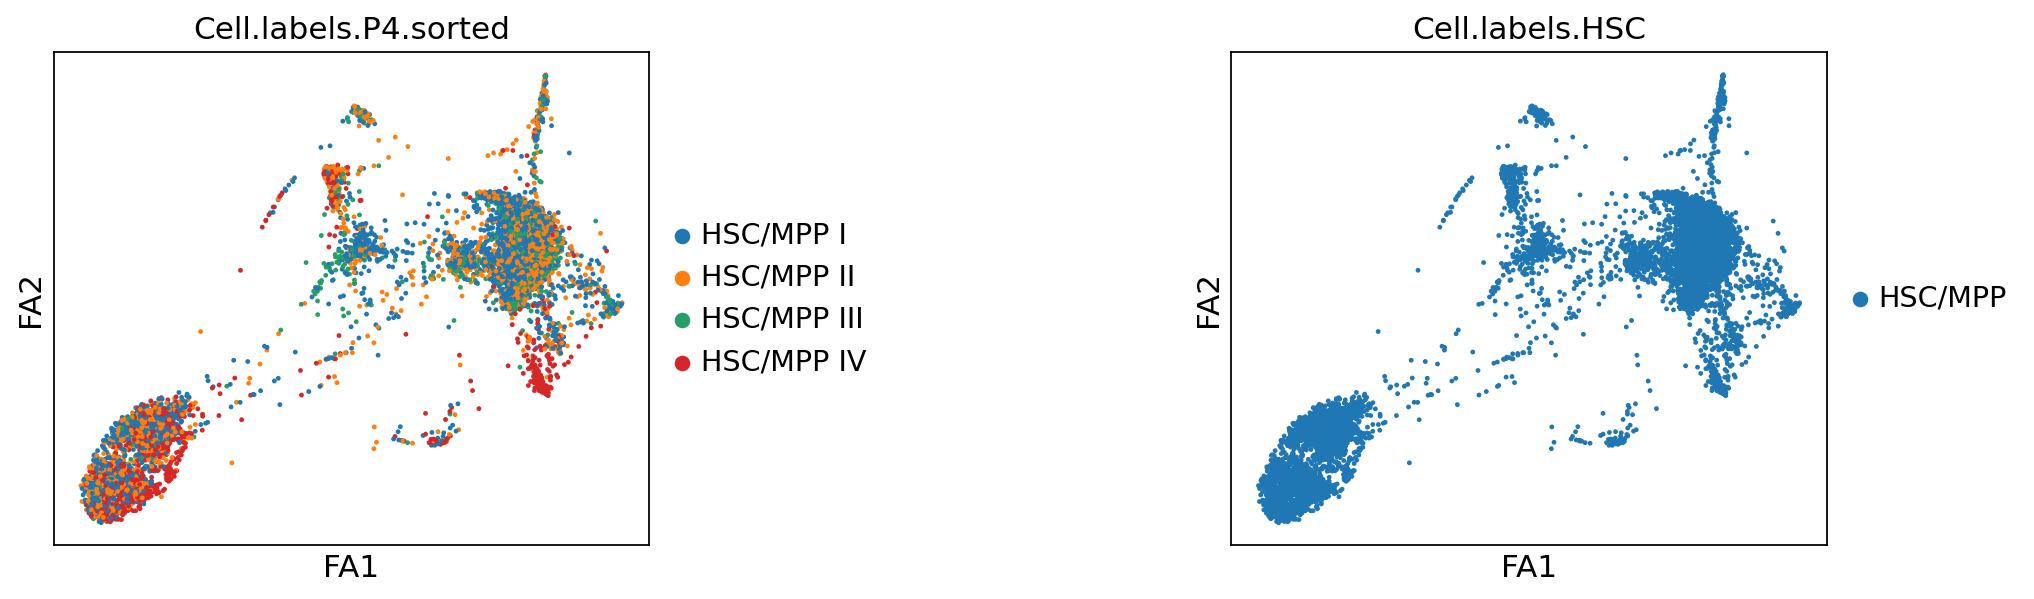

In [66]:
sc.pl.draw_graph(DSB_output0, color=['Cell.labels.P4.sorted','Cell.labels.HSC'], ncols=2, wspace = 0.8, cmap=cmap)

# Harmony correction

In [67]:
#harmony prep - save pca and batch (sample) metadata columns 
pca = DSB_output0.obsm['X_pca']
batch = DSB_output0.obs['assignment']

In [68]:
np.savetxt('./20210420_HSCMPPI-IV_DEP_R3/20210426_mq224_FBMS2-3-H3-F3-E5_CB-G7_FL-A7-A6-C5_pca_harmony_F.csv', pca, delimiter=',')
pd.Series.to_csv(batch, './20210420_HSCMPPI-IV_DEP_R3/20210426_mq224_FBMS2-3-H3-F3-E5_CB-G7_FL-A7-A6-C5_batch_harmony_F.txt',header=False)

In [69]:
pwd

'/rds/project/rds-SDzz0CATGms/users/mq224/project_citeseq/part2citeseq/PhD/Year_1/Collaborations/Haniffa_Lab/Comparison_HSPCs_CD34+_fromFBM_CB_and_FL/ADT'

#######R code
#READ IN THE BATCH
batch <- read.table("CB_CD34_batch_harmony.txt", header = FALSE, sep = ",", dec = ".") rownames(batch) <- batch$V1 batch <- batch[-grep('V1', colnames(batch))] head(batch)
#READ IN THE PCA array
#pca <- read.matrix("CB_CD34_pca_harmony.csv", header = FALSE, sep = "", skip = 0)
#pca <- as.matrix(read.table(file="CB_CD34_pca_harmony.csv", header=FALSE, sep=""))
pca< - read.csv(file = "CB_CD34_pca_harmony.csv") head(pca) dim(pca)
#HARMONY
library(harmony) library(magrittr)
hem = HarmonyMatrix(pca, batch$V2, theta=3, verbose=TRUE, do_pca=FALSE) hem = data.frame(hem) write.csv(hem, "CB_CD34_hem_output.csv", row.names = F, quote = F)
######Rcode

In [70]:
hem = pd.read_csv("./20210420_HSCMPPI-IV_DEP_R3/20210426_mq224_FBMS2-3-H3-F3-E5_CB-G7_FL-A7-A6-C5_hem_output_.csv")

In [71]:
# save old pca values or orig.pca and save batch corrected pca results in anndata object as x_pca
DSB_output0.obsm['X_orig_pca'] = DSB_output0.obsm['X_pca']
DSB_output0.obsm['X_pca'] = hem.values

### Add dimensional reduction post harmony

In [72]:
# run snn neighbourhood graph
sc.pp.neighbors(DSB_output0, n_neighbors=10, n_pcs=30)
sc.tl.leiden(DSB_output0, resolution = 0.3)
sc.tl.louvain(DSB_output0, resolution =0.3)
# run umap
sc.tl.umap(DSB_output0)
# run fdg 
sc.tl.draw_graph(DSB_output0, init_pos='X_pca', layout='fa')

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
running Leiden clustering
    finished: found 9 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 8 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:39)


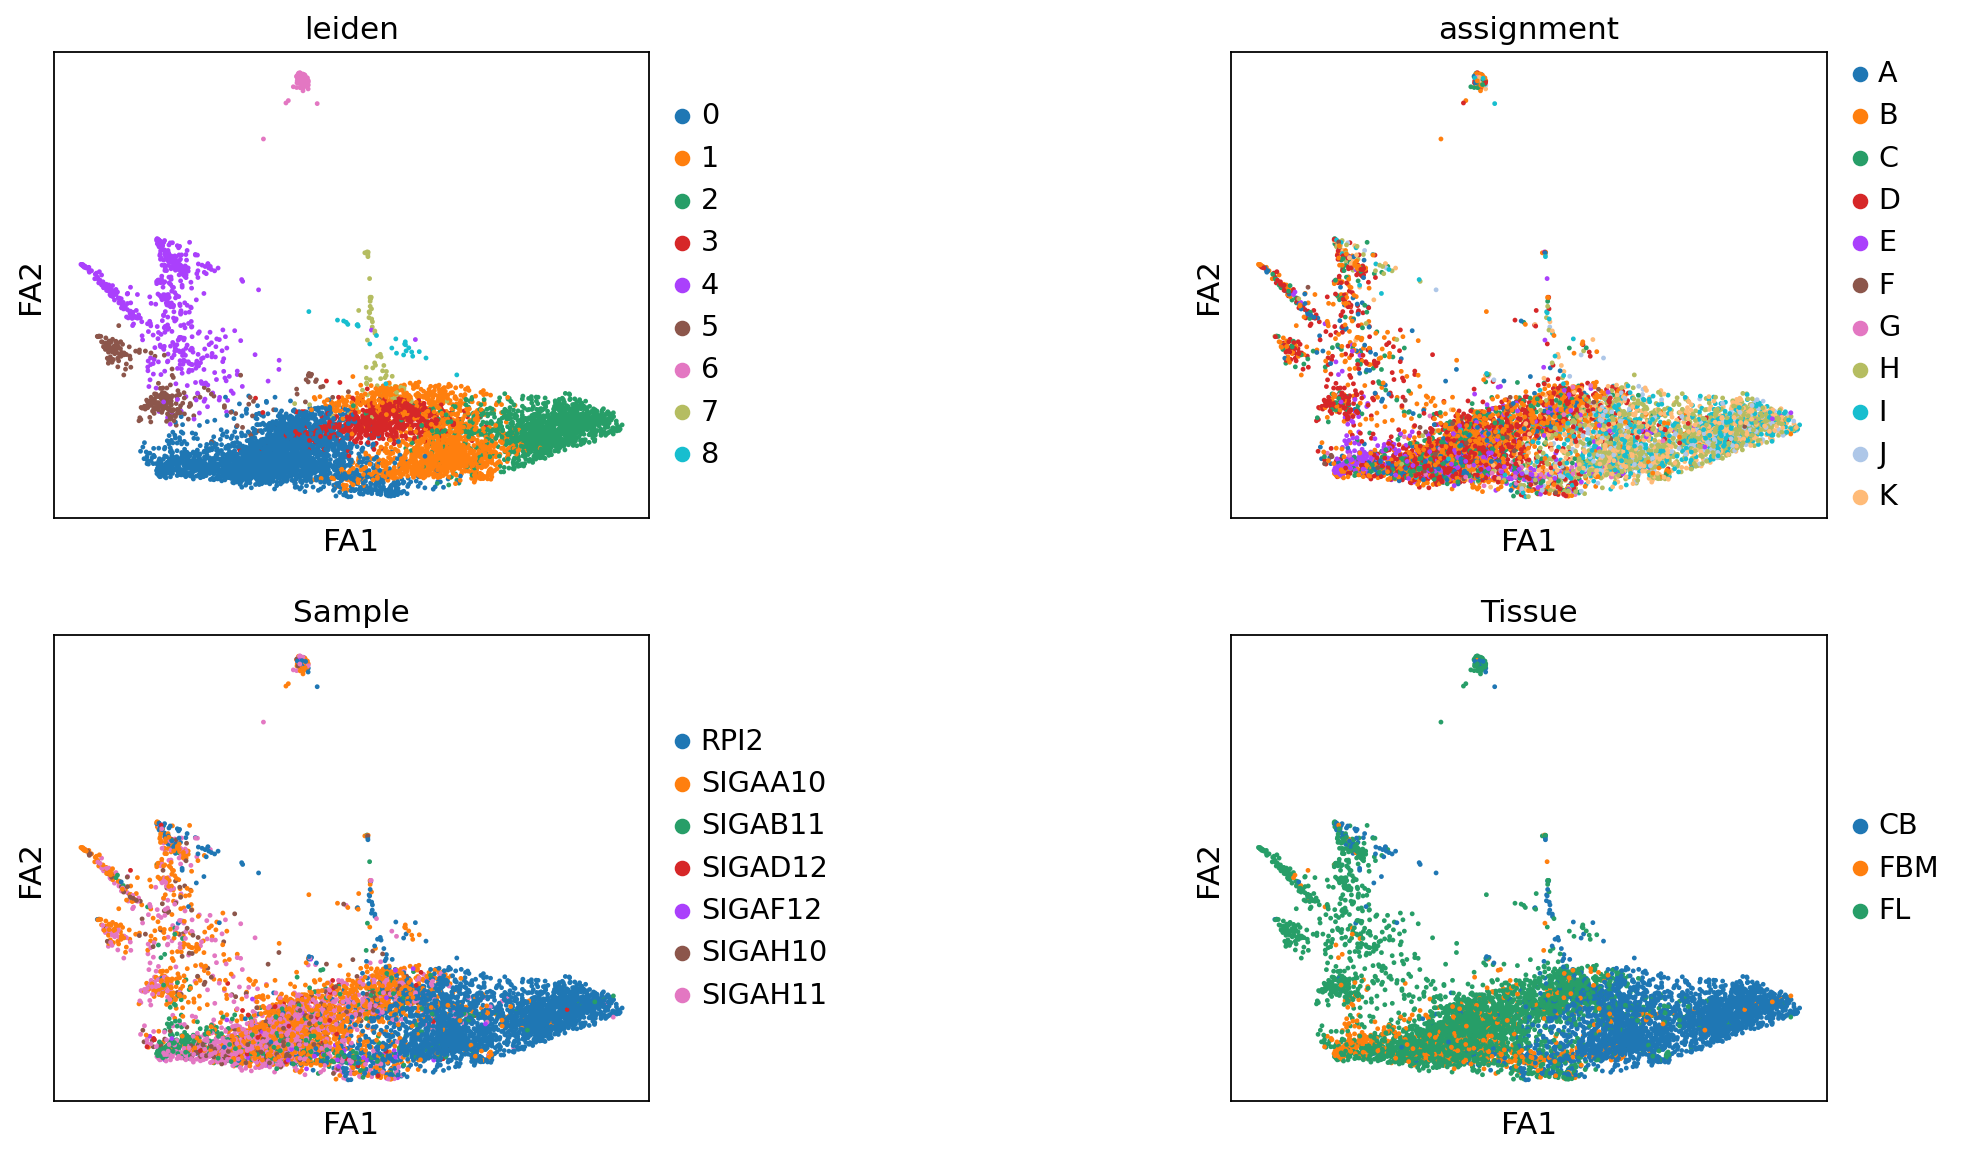

In [73]:
sc.pl.draw_graph(DSB_output0, color=['leiden','assignment','Sample','Tissue'], ncols=2, wspace = 0.8, cmap=cmap)

In [74]:
DSB_output0.write("./20210420_HSCMPPI-IV_DEP_R3/20210426_mq224_postQC_postDSB_postFDG_postHarmony_FBMS2-3-H3-F3-E5_CB-G7_FL-A7-A6-C5.h5ad")

### Using mRNA AND FDG coordinates for downstream analysis

In [75]:
mrna_adata = mrna.copy()

In [76]:
mrna_adata

AnnData object with n_obs × n_vars = 8582 × 24247
    obs: 'lanes', 'mad_prd', 'auto_prd', 'barcode', 'status', 'assignment', 'log_prob_singleton', 'log_prob_doublet', 'cluster0', 'cluster1', 'cluster2', 'Sample', 'Stage', 'Tissue', 'cluster3', 'batch', 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'leiden', 'Cell.labels.P4.sorted', 'Cell.labels.HSC'
    var: 'feature_types', 'gene_ids-0', 'gene_ids-1', 'gene_ids-2', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Sample_colors', 'Stage_colors', 'Tissue_colors', 'assignment_colors', 'draw_graph', 'hvg', 'leiden', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_draw_graph_fa', 'X_orig_pca', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [77]:
#READ FDG
FDG_co = pd.DataFrame(mrna_adata.obsm["X_draw_graph_fa"], index= mrna_adata.obs_names)

#READ CLUSTERS
leiden_cl = pd.DataFrame(mrna_adata.obs['Cell.labels.HSC'], index=mrna_adata.obs_names)

In [78]:
FDG_co.index == leiden_cl.index

array([ True,  True,  True, ...,  True,  True,  True])

In [79]:
#Do the same with the leiden clusters
intersect_cl_ix =  np.intersect1d(leiden_cl.index,DSB_output0.obs.index)
print(len(intersect_cl_ix))
leiden_cl = leiden_cl.loc[intersect_cl_ix]
FDG_co = FDG_co.loc[intersect_cl_ix]
print(leiden_cl.shape)

6422
(6422, 1)


In [80]:
DSB_output0.obs.index

Index(['AAACCCAAGAGCTGCA-3', 'AAACCCAAGGATTCAA-3', 'AAACCCACACGCTGCA-3',
       'AAACCCACAGCGTGCT-6', 'AAACCCAGTAATGATG-5', 'AAACCCAGTCGATTTG-3',
       'AAACCCAGTCGTGCCA-5', 'AAACCCATCATCTATC-5', 'AAACCCATCTAAGCCA-4',
       'AAACGAAAGAAGGTAG-3',
       ...
       'TTTGGTTAGCTAATGA-4', 'TTTGGTTAGCTCTGTA-3', 'TTTGGTTCACAAGTTC-3',
       'TTTGGTTGTCCCGGTA-6', 'TTTGGTTGTCTGCGCA-4', 'TTTGTTGAGCCTTGAT-2',
       'TTTGTTGCAGCACCCA-2', 'TTTGTTGCATAGATGA-5', 'TTTGTTGTCATTCGTT-3',
       'TTTGTTGTCCACTAGA-3'],
      dtype='object', length=6422)

In [81]:
leiden_cl

,Cell.labels.HSC
AAACCCAAGAGCTGCA-3,HSC/MPP
AAACCCAAGGATTCAA-3,HSC/MPP
AAACCCACACGCTGCA-3,HSC/MPP
AAACCCACAGCGTGCT-6,HSC/MPP
AAACCCAGTAATGATG-5,HSC/MPP
...,...
TTTGTTGAGCCTTGAT-2,HSC/MPP
TTTGTTGCAGCACCCA-2,HSC/MPP
TTTGTTGCATAGATGA-5,HSC/MPP
TTTGTTGTCATTCGTT-3,HSC/MPP


In [82]:
#Substituting ab clusters for mRNA clusters!
DSB_output0.obs['Cell.labels.HSC'] = leiden_cl.astype(str)

In [83]:
DSB_output0.obs['Cell.labels.HSC']

AAACCCAAGAGCTGCA-3    HSC/MPP
AAACCCAAGGATTCAA-3    HSC/MPP
AAACCCACACGCTGCA-3    HSC/MPP
AAACCCACAGCGTGCT-6    HSC/MPP
AAACCCAGTAATGATG-5    HSC/MPP
                       ...   
TTTGTTGAGCCTTGAT-2    HSC/MPP
TTTGTTGCAGCACCCA-2    HSC/MPP
TTTGTTGCATAGATGA-5    HSC/MPP
TTTGTTGTCATTCGTT-3    HSC/MPP
TTTGTTGTCCACTAGA-3    HSC/MPP
Name: Cell.labels.HSC, Length: 6422, dtype: object

In [84]:
#This is for the second experiment APPLYING DSB
DSB_output0.obsm['X_draw_graph_fa'] = FDG_co[[0,1]].values

In [85]:
DSB_output0

AnnData object with n_obs × n_vars = 6422 × 198
    obs: 'Sample', 'batch', 'leiden', 'louvain', 'assignment', 'Tissue', 'Cell.labels.HSC', 'Cell.labels.P4.sorted'
    var: 'bg_mean'
    uns: 'pca', 'neighbors', 'umap', 'draw_graph', 'leiden', 'louvain', 'leiden_colors', 'assignment_colors', 'Sample_colors', 'Tissue_colors', 'Cell.labels.P4.sorted_colors', 'Cell.labels.HSC_colors'
    obsm: 'X_pca', 'X_umap', 'X_draw_graph_fa', 'X_orig_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [86]:
adata_celltype = DSB_output0.obs.groupby(['Cell.labels.HSC']).apply(len)
adata_celltype

Cell.labels.HSC
HSC/MPP    6422
dtype: int64

In [87]:
#This is for the second experiment APPLYING DSB
DSB_output0.uns['draw_graph'] ={}
DSB_output0.uns['draw_graph']["params"]={}
DSB_output0.uns['draw_graph']['params']['layout'] = 'fa'

In [88]:
HSCs=["CD34", "CD38", "CD45RA", "CD90", "CD49f", "CD123", "CD117", "CD133", "CD10", "CD7"]

In [89]:
cl7=['IgG_Fc', 'CD45RA', 'CD81', 'IgM', 'CD22',
       'integrin_b7', 'CD24', 'CD105', 'CD72', 'CD9']

In [90]:
DSB_output0.write("./20210420_HSCMPPI-IV_DEP_R3/20210426_mq224_ADTonmRNA_postHarmony_FBMS2-3-H3-F3-E5_CB-G7_FL-A7-A6-C5.h5ad")

... storing 'Cell.labels.HSC' as categorical


# DEP 

In [91]:
DSB_output0.X = np.where(DSB_output0.X < 0, 0, DSB_output0.X)

In [92]:
#Checks
np.min(DSB_output0.X)

0.0

In [93]:
adata_celltype = DSB_output0.obs.groupby(['Cell.labels.P4.sorted']).apply(len)
adata_celltype

Cell.labels.P4.sorted
HSC/MPP I      2754
HSC/MPP II     1982
HSC/MPP III     671
HSC/MPP IV     1015
dtype: int64

In [94]:
DSB_output0.obs["HSC/MPP_Tissue"]=DSB_output0.obs["Cell.labels.HSC"].astype(str)+"_"+DSB_output0.obs["Tissue"].astype(str)

In [95]:
adata_cell_tissue = DSB_output0.obs.groupby(["HSC/MPP_Tissue"]).apply(len)
adata_cell_tissue

HSC/MPP_Tissue
HSC/MPP_CB     2551
HSC/MPP_FBM     589
HSC/MPP_FL     3282
dtype: int64

In [96]:
# run degs on normalised, logged and scaled data 
# calculate degs using wilcoxon rank sum test with benjamini-hochberg correction. 
#based on ln transformed count data 
sc.tl.rank_genes_groups(DSB_output0, groupby="HSC/MPP_Tissue", method='wilcoxon', use_raw=False, log_transformed=False, groups = ['HSC/MPP_FL', 'HSC/MPP_FBM', 'HSC/MPP_CB'])

ranking genes


... storing 'HSC/MPP_Tissue' as categorical


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


In [97]:
# filter the degs for those which are expressed in at least 25% of cells in cluster. 
#log2fc of the ln-transformed
# data will be shown.
sc.tl.filter_rank_genes_groups(DSB_output0, min_in_group_fraction=0.25, min_fold_change = 0.25, use_raw=False)

Filtering genes using: min_in_group_fraction: 0.25 min_fold_change: 0.25, max_out_group_fraction: 0.5


In [98]:
# save df for unfiltered degs
result = DSB_output0.uns['rank_genes_groups']
groups = result['names'].dtype.names
degs_by_cluster = pd.DataFrame({group + '_' + key[:7]: result[key][group]
    for group in groups for key in ['names', 'logfoldchanges', 'pvals', 'pvals_adj']})

# the degs_by_cluster df shows the log2 fold change for each gene ordered by z-score underlying the computation 
# of a p-value for each gene for each group
degs_by_cluster.to_csv("./20210420_HSCMPPI-IV_DEP_R3/20210426_mq224_DEAbWilcoxon_BHcorrection_FL-FBM-CBgroups_mRNA_HSCMPP-I-IV_only_ccincluded_FBMS2-3-H3-F3-E5_CB-G7_FL-A7-A6-C5.csv")
degs_by_cluster[:10]

,HSC/MPP_FL_names,HSC/MPP_FL_logfold,HSC/MPP_FL_pvals,HSC/MPP_FL_pvals_a,HSC/MPP_FBM_names,HSC/MPP_FBM_logfold,HSC/MPP_FBM_pvals,HSC/MPP_FBM_pvals_a,HSC/MPP_CB_names,HSC/MPP_CB_logfold,HSC/MPP_CB_pvals,HSC/MPP_CB_pvals_a
0,CD73,8.454007,0.0,0.0,CD10,2.161169,1.064164e-18,3.144842e-18,CD99,14.857030,0.0,0.0
1,Siglec8,4.282342,0.0,0.0,CD19,1.781573,2.139225e-07,4.235666e-07,CD205,8.982144,0.0,0.0
2,CD33,15.374333,0.0,0.0,integrin_b7,2.151680,2.766285e-06,5.216423e-06,CD31,11.183167,0.0,0.0
3,CD49a,10.138382,0.0,0.0,CD45RA,0.741670,5.536402e-03,7.457194e-03,CD15,5.033445,0.0,0.0
4,CD144,3.367257,0.0,0.0,CD99,-0.929891,9.944821e-03,1.270371e-02,CD71,7.724559,0.0,0.0
5,CD146,7.109931,0.0,0.0,CD177,0.280645,1.257572e-01,1.482139e-01,IgM,6.412253,0.0,0.0
6,CD34,7.193419,0.0,0.0,CD335,0.477180,1.843107e-01,2.121716e-01,CD69,17.101023,0.0,0.0
7,RTK2071,3.192558,0.0,0.0,CD72,1.411441,4.211099e-01,4.684256e-01,CD93,8.473481,0.0,0.0
8,CLEC1B,8.758219,0.0,0.0,TSLPR,0.424156,6.111901e-01,6.541386e-01,CD110,10.938136,0.0,0.0
9,CD74,3.177681,0.0,0.0,CD304,1.517228,9.299170e-01,9.576691e-01,CD44,10.503249,0.0,0.0


In [99]:
print(DSB_output0)

AnnData object with n_obs × n_vars = 6422 × 198
    obs: 'Sample', 'batch', 'leiden', 'louvain', 'assignment', 'Tissue', 'Cell.labels.HSC', 'Cell.labels.P4.sorted', 'HSC/MPP_Tissue', '__is_in_cluster__'
    var: 'bg_mean'
    uns: 'pca', 'neighbors', 'umap', 'draw_graph', 'leiden', 'louvain', 'leiden_colors', 'assignment_colors', 'Sample_colors', 'Tissue_colors', 'Cell.labels.P4.sorted_colors', 'Cell.labels.HSC_colors', 'rank_genes_groups', 'rank_genes_groups_filtered'
    obsm: 'X_pca', 'X_umap', 'X_draw_graph_fa', 'X_orig_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'


In [100]:
# Plot per cell type a dotplot  

In [101]:
DSB_output0.obs["HSC/MPPtypes_Tissue"]=DSB_output0.obs['Cell.labels.P4.sorted'].astype(str)+"_"+DSB_output0.obs["Tissue"].astype(str)

In [120]:
#proteins= ["CD34","CD304","CD33","CD49a","CLEC1B","CD73","CD10","integrin_b7","CD19",
#"CD72","CD69","CD99","CD2","CD31","CD110","CD205","CD62L","CD110","CD244","CD275","CD8"]

proteins = ["CD34","CD33","CD49a","CLEC1B","CD73","CD146","EGFR","CD90",
            "CD109","CD10","integrin_b7","CD19","CD69","CD99","CD2","CD31","CD110","CD44"]

In [121]:
new_order=['HSC/MPP I_FL','HSC/MPP II_FL','HSC/MPP III_FL','HSC/MPP IV_FL', 'HSC/MPP I_FBM', 
           'HSC/MPP II_FBM','HSC/MPP III_FBM','HSC/MPP IV_FBM','HSC/MPP I_CB', 
           'HSC/MPP II_CB','HSC/MPP III_CB','HSC/MPP IV_CB']

In [122]:
DSB_output0.obs["HSC/MPPtypes_Tissue"]=DSB_output0.obs["HSC/MPPtypes_Tissue"].astype("category")

In [123]:
DSB_output0.obs["HSC/MPPtypes_Tissue.sorted"] = DSB_output0.obs["HSC/MPPtypes_Tissue"].cat.reorder_categories(new_order)

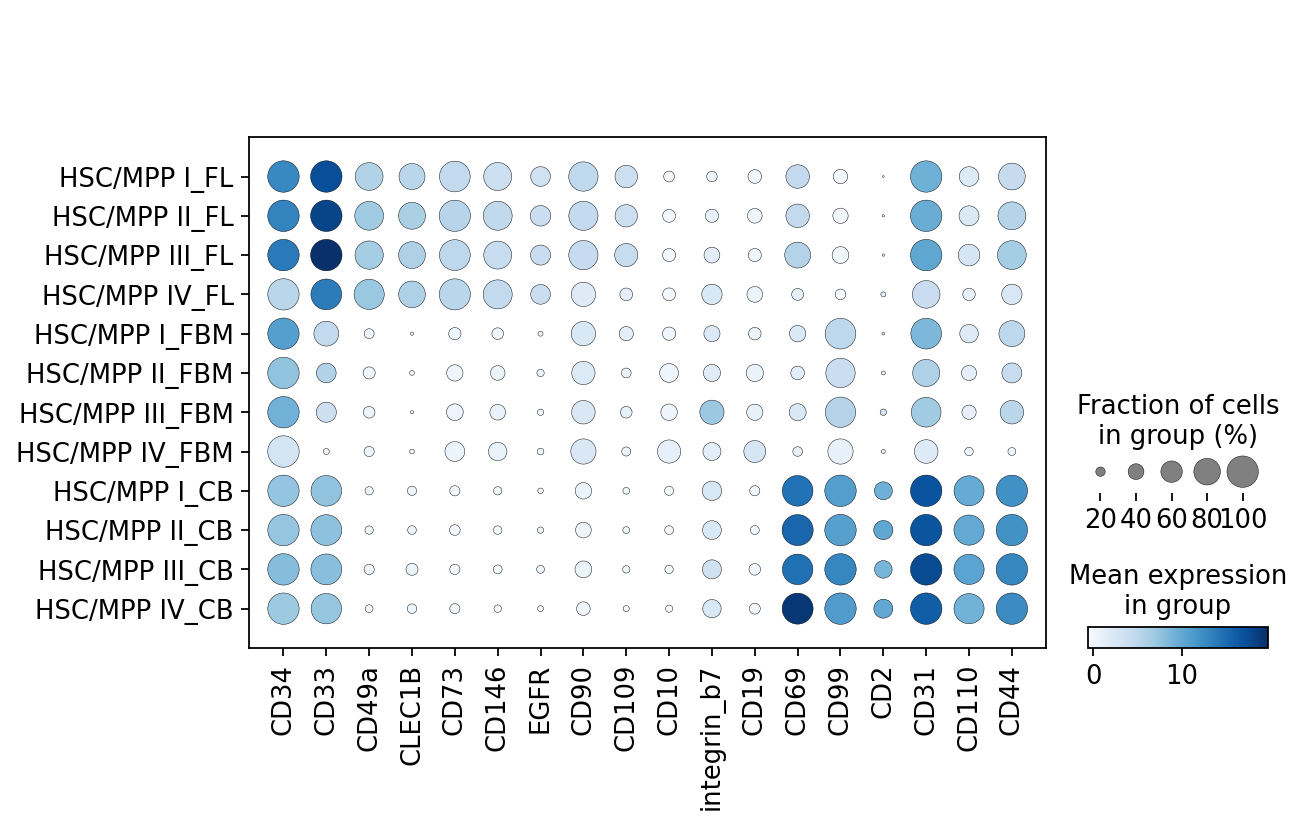

In [124]:
sc.pl.dotplot(DSB_output0, var_names=proteins, groupby="HSC/MPPtypes_Tissue.sorted",cmap="Blues", save= "20210427_ADTonmRNA_CD34_HSC-MPP-I-IV_2.pdf")